#**Import libraries**

In [85]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
import pandas as pd
import seaborn as sns

#**Load Wine Quality data**

In [86]:
df = pd.read_csv('https://archive.ics.uci.edu/static/public/186/data.csv')
print("Dataset Head:")
print(df.head())

Dataset Head:
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8      

#**Exploratory Data Analysis**

##Check for missingness and data types

In [87]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


##Scale data

In [88]:
# Select only numeric columns for scaling
numeric_cols = df.select_dtypes(include=['number']).columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

##Check for data distribution

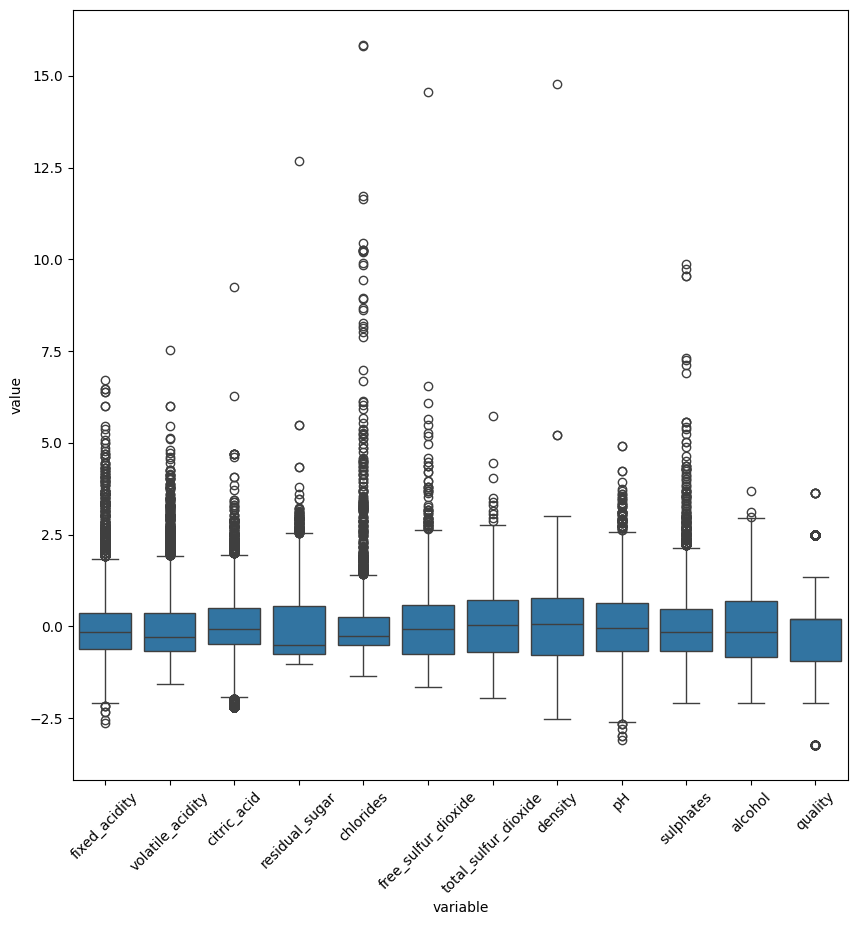

In [89]:
plt.figure(figsize=(10,10))

df_melted = pd.melt(df, id_vars=['color'], value_vars=numeric_cols)

# Create the boxplot
sns.boxplot(x='variable', y='value', data=df_melted)
plt.xticks(rotation=45)
plt.show()

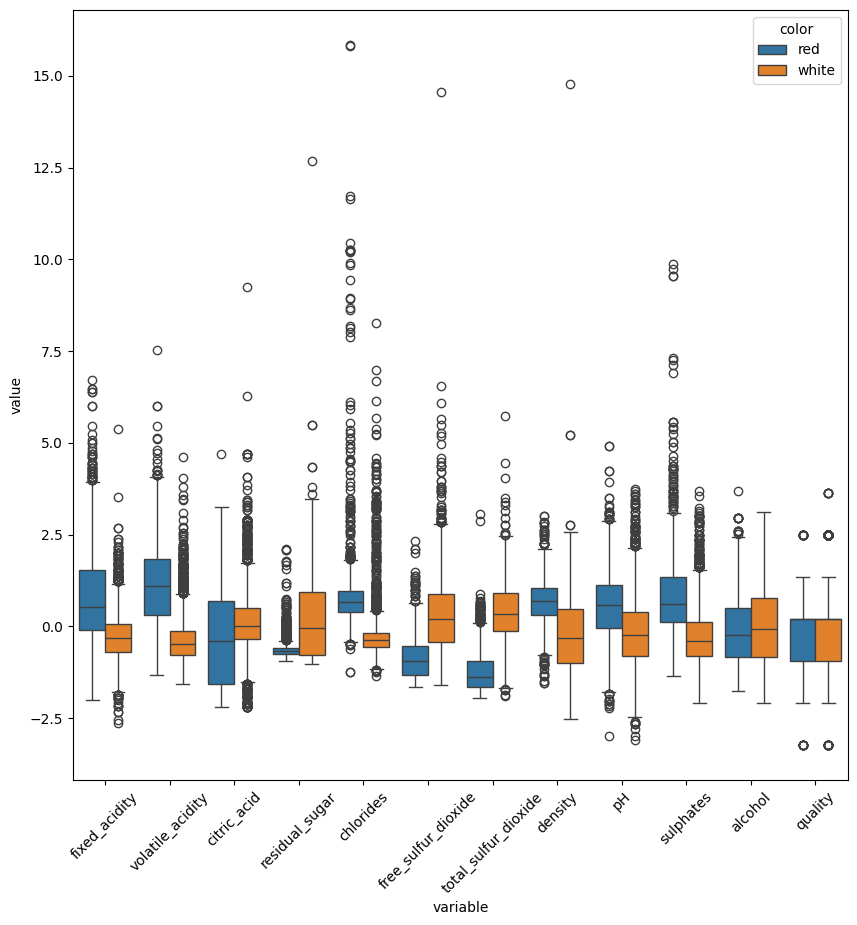

In [90]:
plt.figure(figsize=(10,10))

# Create the boxplot with hue
sns.boxplot(x='variable', y='value', hue='color', data=df_melted)
plt.xticks(rotation=45)
plt.show()

##Check for relationships

<Figure size 1000x1000 with 0 Axes>

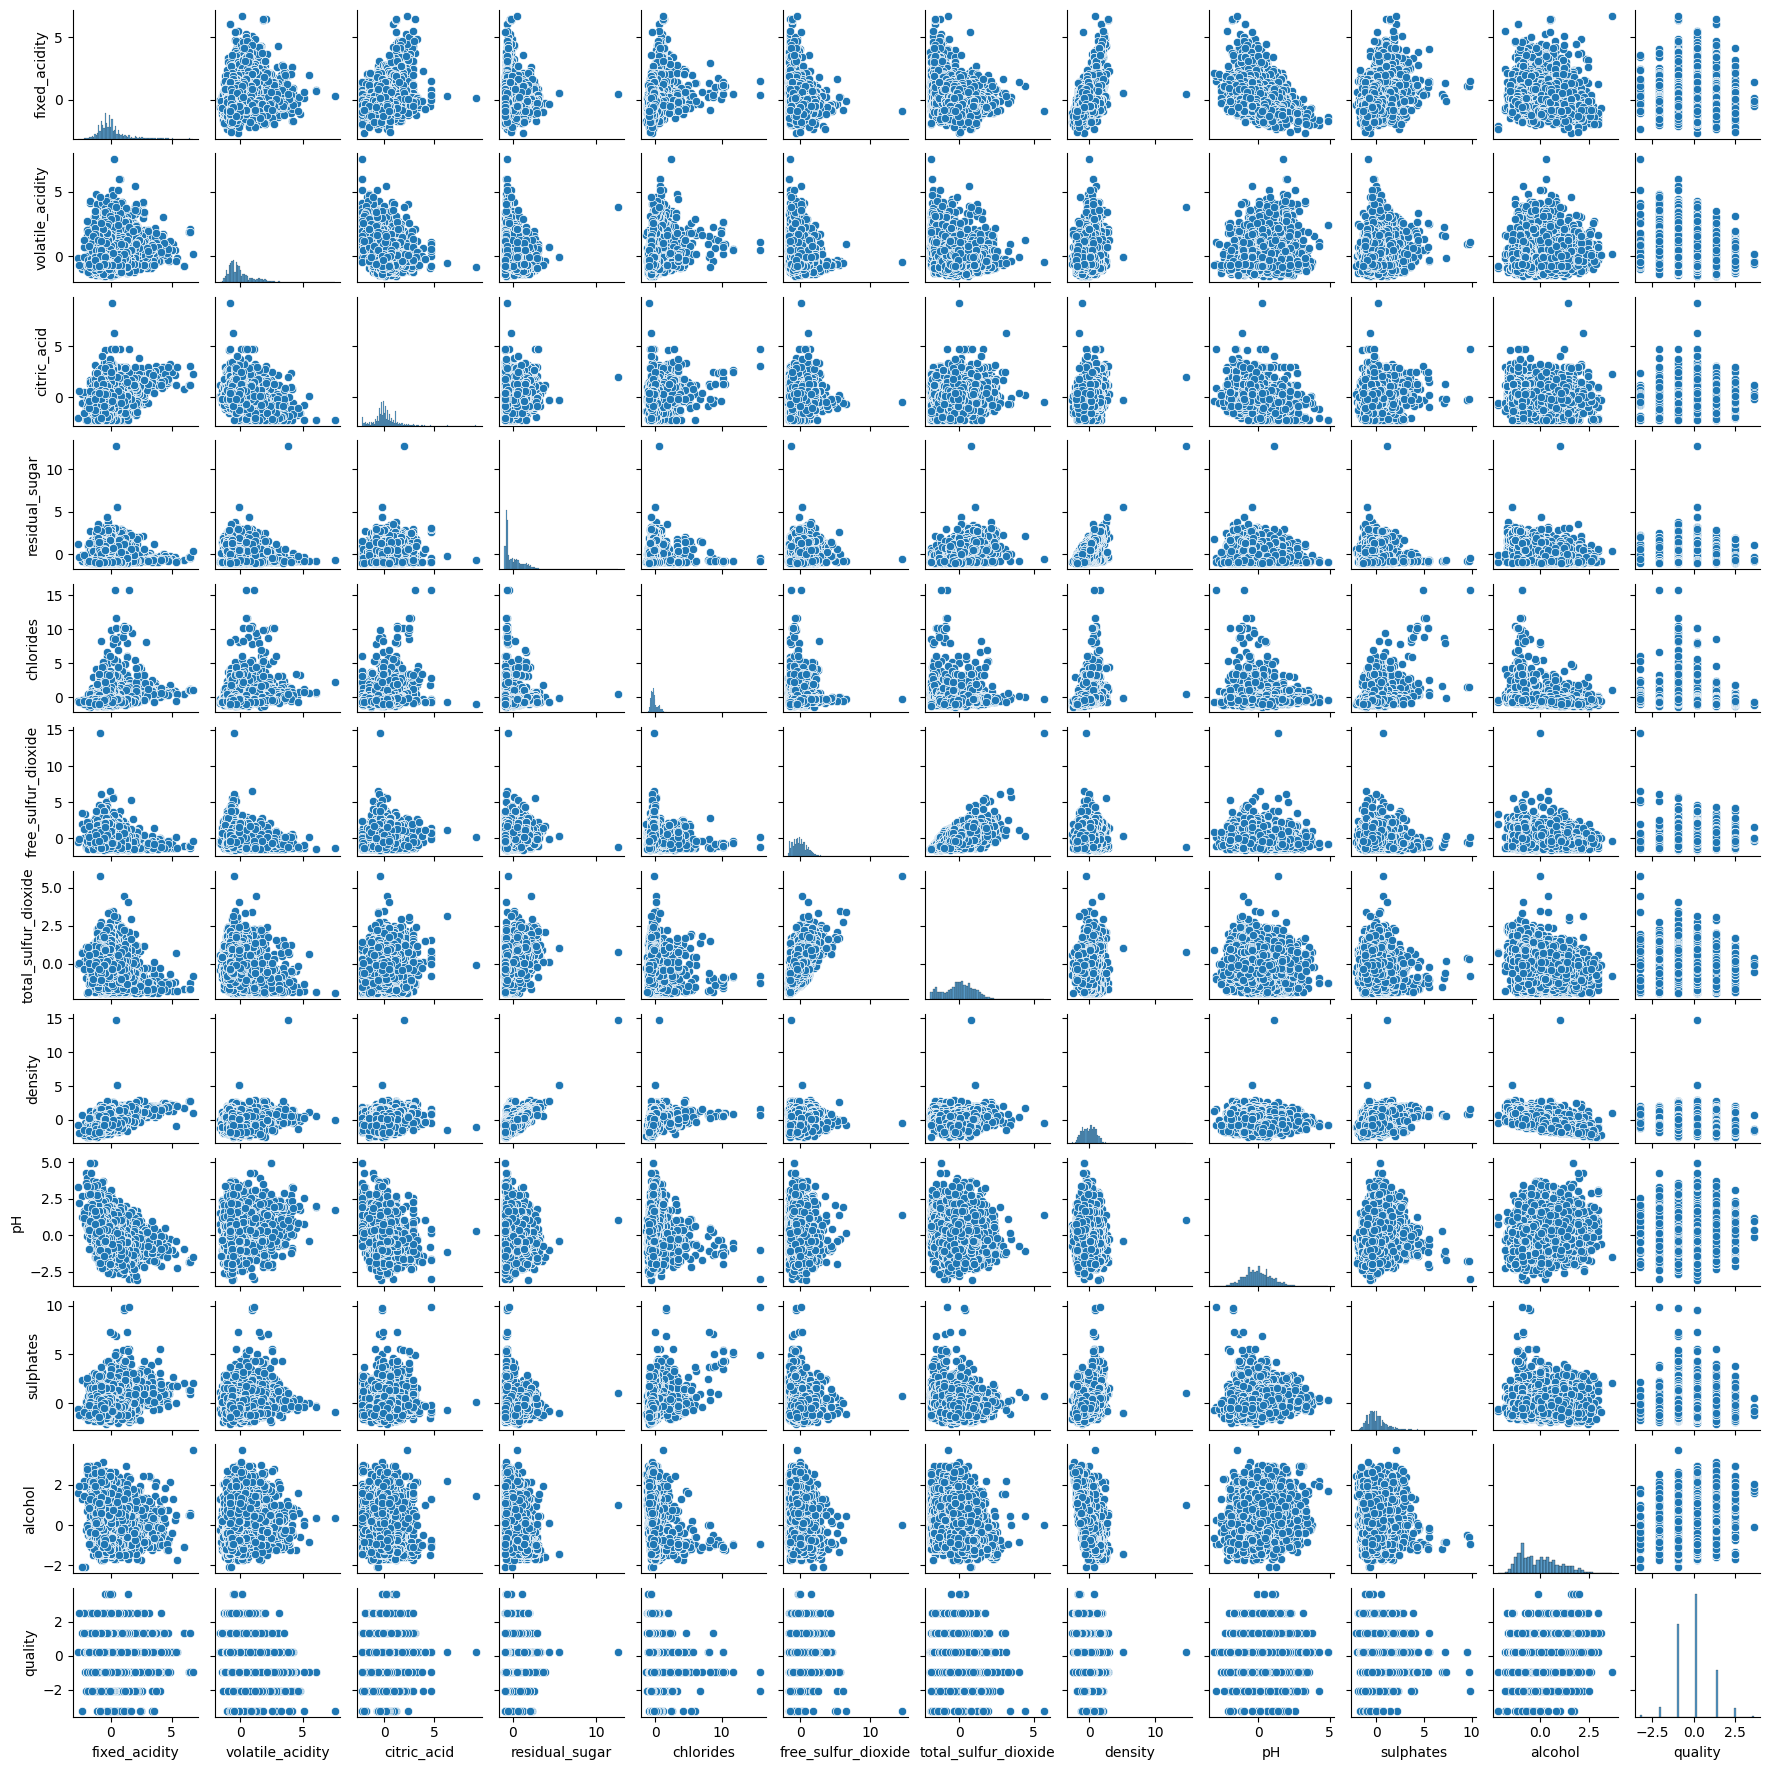

In [91]:
# Plot correlogram
plt.figure(figsize=(10,10))
sns.pairplot(df, height=1.5)
plt.show()

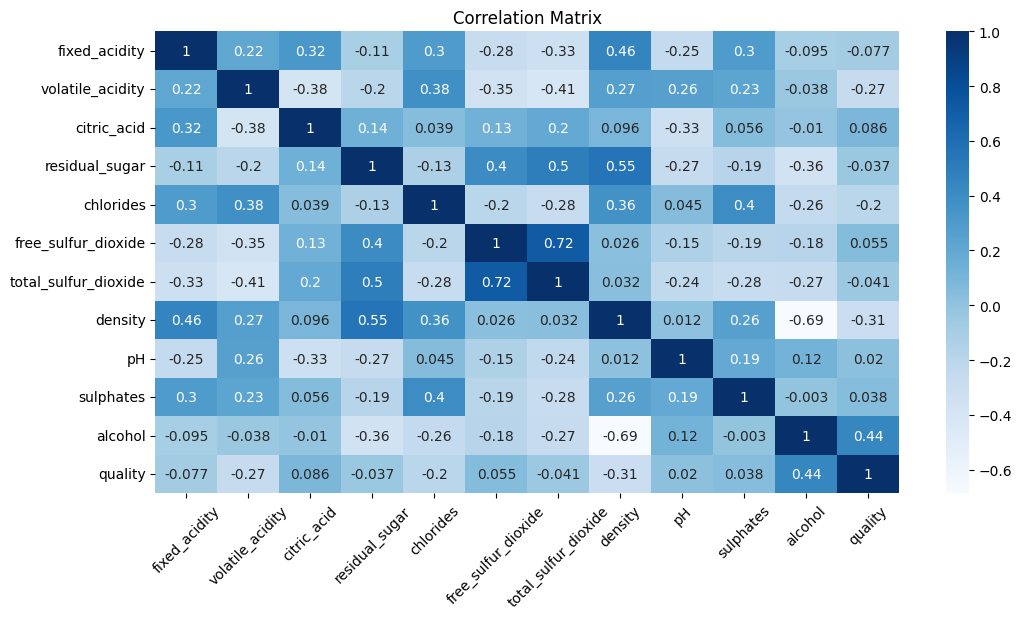

In [92]:
#Correlation matrix
plt.figure(figsize=(12, 6))
corr_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x1000 with 0 Axes>

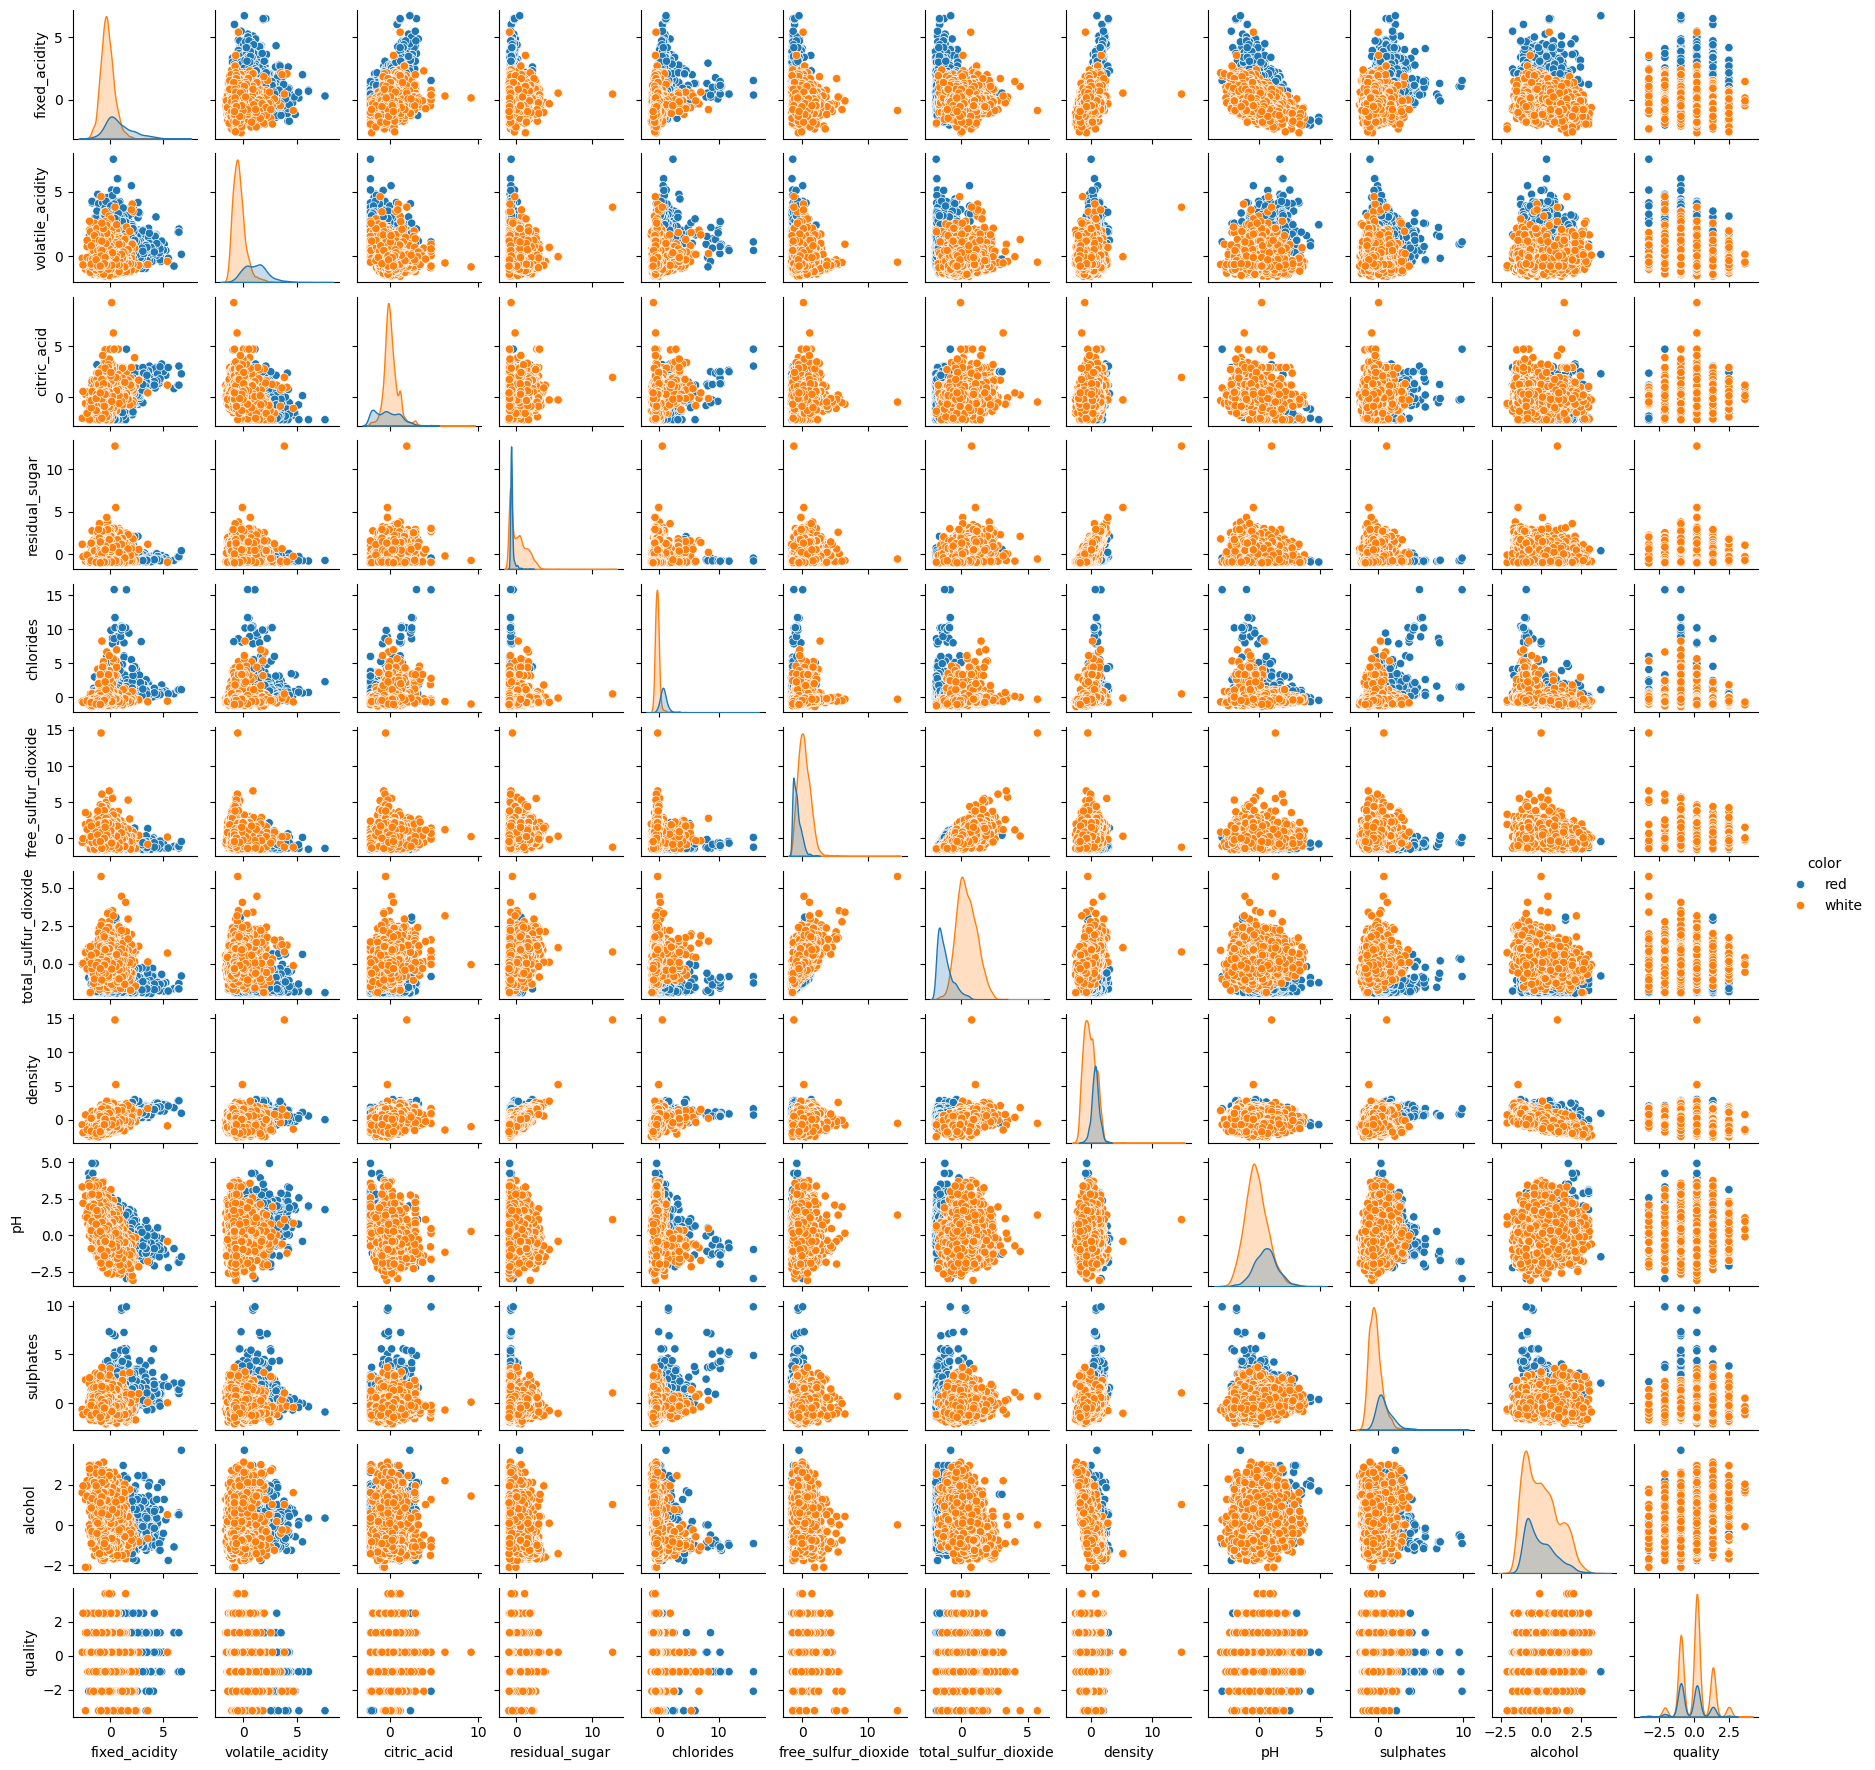

In [93]:
# Plot correlogram
plt.figure(figsize=(10,10))
sns.pairplot(df, hue='color', height=1.5)
plt.show()

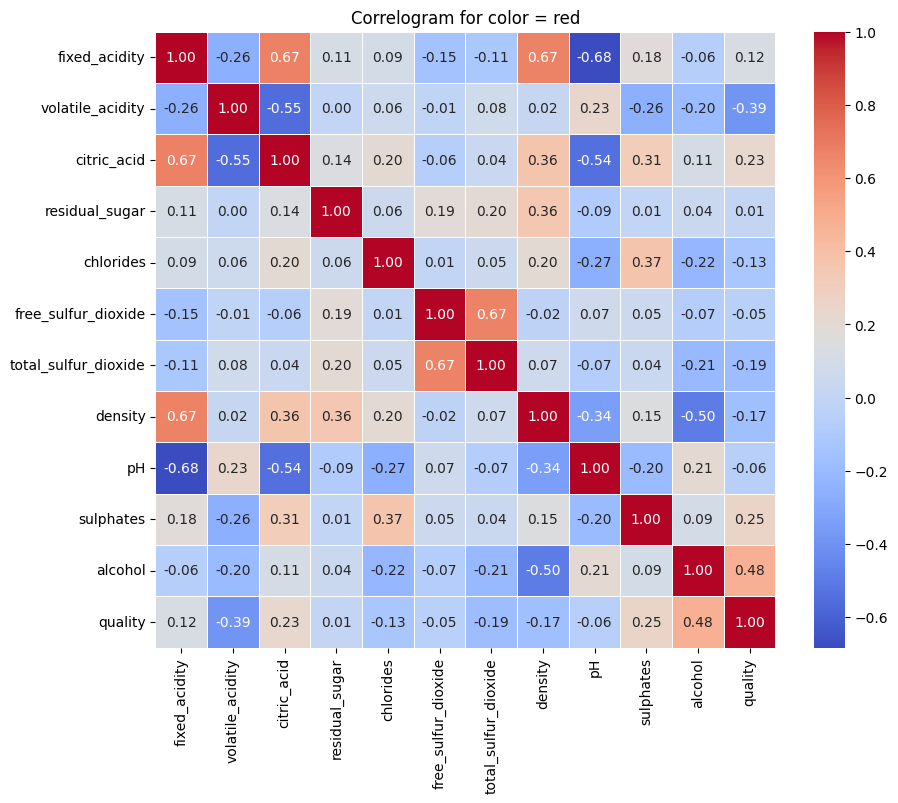

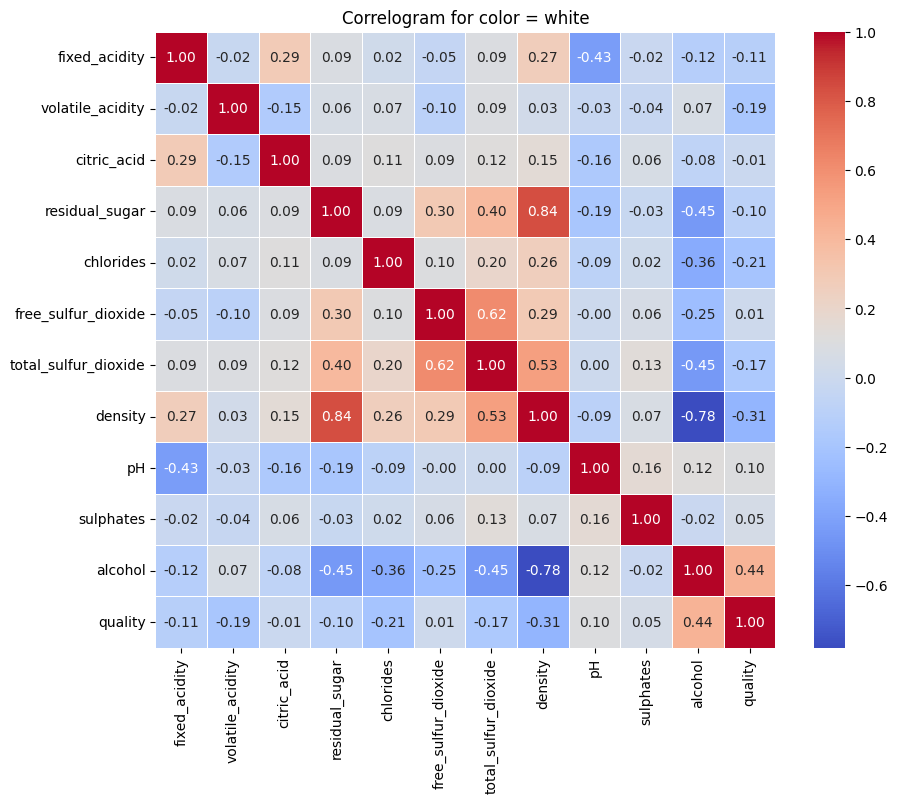

In [94]:
#Correlation matrix by wine color
categorical_var = df.select_dtypes(include=['object']).columns[0] if not df.select_dtypes(include=['object']).empty else None
categories = df[categorical_var].unique()

for category in categories:
    plt.figure(figsize=(10, 8))
    subset = df[df[categorical_var] == category]
    sns.heatmap(subset[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title(f"Correlogram for {categorical_var} = {category}")
    plt.show()